In [46]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [47]:

#annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)
annFile='./COCO_style_results/pascal_val2012_gndtruth.json'

In [48]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.17s)
creating index...
index created!


In [49]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n\n', ' '.join(nms))

#nms = set([cat['supercategory'] for cat in cats])
#print('COCO supercategories: \n', ' '.join(nms))

COCO categories: 

 background aeroplane bicycle bird boat bottle bus car cat chair cow diningtable dog horse motorbike person pottedplant sheep sofa train tvmonitor


In [50]:
categories = list(range(21))

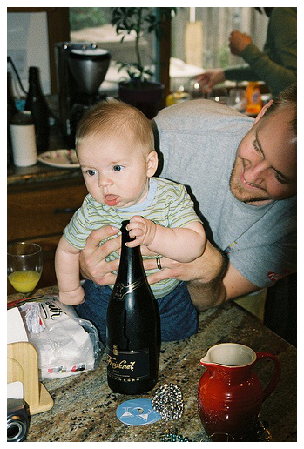

In [97]:
# load and display image
# NOTE: make sure this image is part of the segmentation val set
# otherwise you wont get any segmentation for it
img_name = "2007_001408.jpg"
img_id = int(img_name.replace("_", "")[:-4])
I = io.imread("/home/cyrus/Datasets/VOCdevkit/VOC2012/JPEGImages/%s" %img_name)
# use url to load image
#I = io.imread('http://mscoco.org/images/%d'%(img['id']))
plt.figure(); plt.axis('off')
plt.imshow(I)
plt.show()

ground truth objects: 6


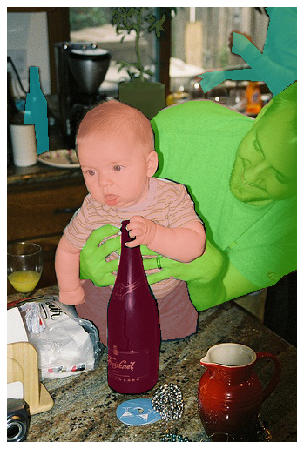

In [98]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
#annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
annIds = coco.getAnnIds(imgIds=[img_id], catIds=categories, iscrowd=None)
anns = coco.loadAnns(annIds)
#print(anns)
coco.showAnns(anns)
#print n of anns
print("ground truth objects:", len(anns))

In [99]:
# get maskrcnn predictions
cocoDt=coco.loadRes('./COCO_style_results/voc2012_val_maskrcnn.json')

Loading and preparing results...
DONE (t=0.28s)
creating index...
index created!


29


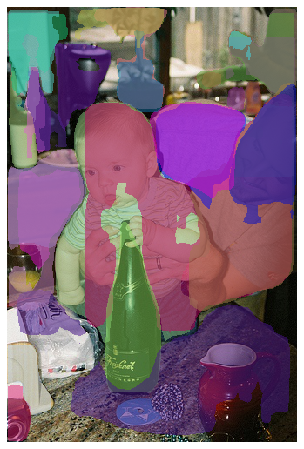

In [100]:
# load and display prediction annotations
plt.imshow(I); plt.axis('off')
resIds = cocoDt.getAnnIds(imgIds=[img_id], catIds=categories, iscrowd=None)
anns = cocoDt.loadAnns(resIds)
#print(anns)
cocoDt.showAnns(anns)
#print number of anns
print(len(anns))

In [101]:
# get deeplab predictions
cocoDt=coco.loadRes('./COCO_style_results/voc2012_val_deeplab_trainval_minarea960.json')

Loading and preparing results...
DONE (t=0.05s)
creating index...
index created!


5


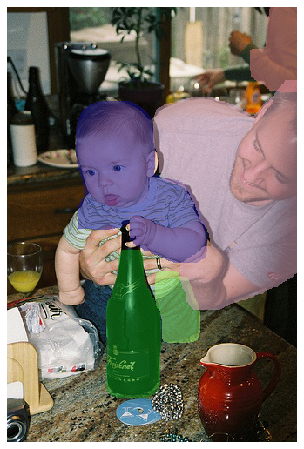

In [102]:
# load and display prediction annotations
plt.imshow(I); plt.axis('off')
resIds = cocoDt.getAnnIds(imgIds=[img_id], catIds=categories, iscrowd=None)
anns = cocoDt.loadAnns(resIds)
#print(anns)
cocoDt.showAnns(anns)
# print number of detections
print(len(anns))